# Mapa Logistico

El mapa logístico es un mapeo polinomial equivalente, a la relación de recurrencia de grado 2, a menudo citado como un ejemplo arquetípico de cómo el comportamiento complejo y caótico puede surgir a partir de ecuaciones dinámicas no lineales muy simples. Matemáticamente, el mapa logístico está escrito
$$x_{n+1}=rx_{n}(1-x_{n})$$
donde $x_{n}$ es un número entre cero y uno que representa la proporción de población existente a la población máxima posible. Los valores de interés para el parámetro $r$ (a veces también denominado $\mu$) son aquellos en el intervalo $[0,4]$.

In [1]:
#El programa hace el diagrama de bifurcación del mapa logístico obtenido al trazar como una función de una serie de valores para x_n obtenida comenzando con un valor aleatorio x_0, iterando muchas veces y descartando los primeros puntos correspondientes a los valores antes de que los iterados converjan a el atractor, o lo que es lo mismo que el conjunto de puntos fijos de x_n que corresponden a un valor dado de r se trazan para valores de r que aumentan positivamente.

function bifurcacion(x0)
     x = x0
     listx=[]
    c=1:0.00001:4
     for i in 1:length(c)
        r=c[i] #r es una constante positiva que da el mapa logistico
        x = r*x*(1-x)  #x es la ecuación de recurrencia cuadrática
        push!(listx,x) #con push! se guardan los elementos de x en listx en un arreglo de length(c)x1
     end
     return listx #Devuelve los valores de x en un arreglo o matriz
end

bifurcacion (generic function with 1 method)

In [2]:
#En esta parte se usa "for" para iterar los valores que va a tomar el parametro r en un intervalo de (1,4)

c=1:0.00001:4
function valor_r(c)
     listr=[]
    for i in 1:length(c)
        r=c[i]
        push!(listr,r) 
     end
     return listr
end

valor_r (generic function with 1 method)

In [3]:
using PyPlot

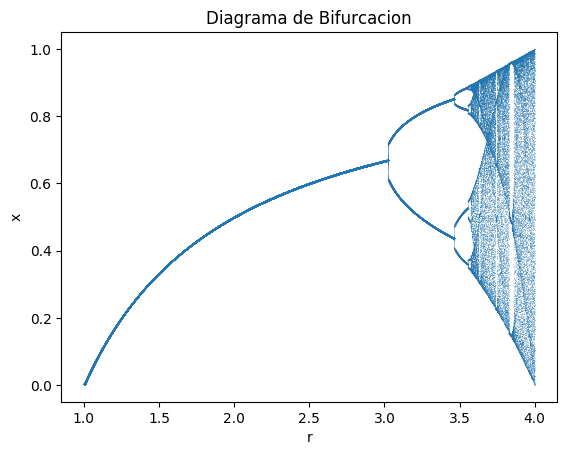

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fecb63ae1d0>

In [4]:
xlabel("r")
ylabel("x")
title("Diagrama de Bifurcacion")
plot(valor_r(c),bifurcacion(0.01),alpha=0.5,"x",markersize=0.1)

# Exponente Lyapunov

El Exponente Lyapunov o Exponente característico Lyapunov de un sistema dinámico es una cantidad que caracteriza el grado de separación de dos trayectorias infinitesimalmente cercanas. Su expresion matematica esta dada como:
$$\lambda\approx\frac{1}{N}\sum^N_{n=1}log|r-2rx_{n}|$$
donde
$$x_{n}=rx_{n-1}(1-x_{n-1})$$
Este número, llamado el exponente de Lyapunov $\lambda$, es útil para distinguir entre los diversos tipos de órbitas. Funciona tanto para sistemas discretos como continuos. Los casos para $\lambda$ se describen a continuaciòn:

1) $\lambda<0$

La órbita atrae a un punto fijo estable o a una órbita periódica estable. Los exponentes negativos de Lyapunov son característicos de los sistemas disipativos o no conservadores tales como el oscilador armónico amortiguado. Dichos sistemas exhiben estabilidad asintótica; cuanto más negativo es el exponente, mayor es la estabilidad. Los puntos fijos superestables y los puntos periódicos superestables tienen un exponente Lyapunov de $\lambda=-\infty$.

2) $\lambda=0$

La órbita es un punto fijo neutral o un punto fijo eventual. Un exponente Lyapunov de cero indica que el sistema está en algún tipo de modo de estado estacionario, de tal forma que un sistema físico con este exponente es conservador. Tales sistemas exhiben la estabilidad de Lyapunov.

3) $\lambda>0$

La órbita es inestable y caótica. Por lo que los puntos cercanos, sin importar cuán cerca estén, divergirán a cualquier separación arbitraria. 

In [1]:
c=1:0.001:4
function Exp_Lyapunov(x,r)
    I=0
   for i in 1:1000
        x=r*x*(1-x)
        I=I+log(abs(r*(1-2*x)))
    end
    return I/1000
end

Exp_Lyapunov (generic function with 1 method)

In [2]:
c=1:0.001:4
function valor_r(c)
     listr=[]
    for i in 1:length(c)
    push!(listr,ones(length(c))*c[i]) 
    end
     return listr
end

valor_r (generic function with 1 method)

In [3]:
using PyPlot

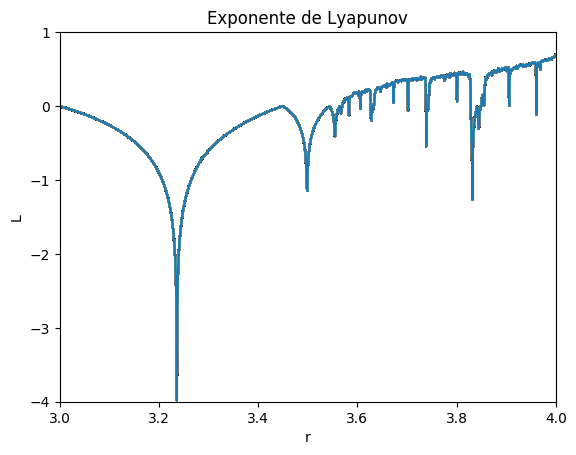

(-4,1)

In [4]:
xlabel("r")
ylabel("L")
title("Exponente de Lyapunov")
plot(valor_r(c),Exp_Lyapunov.(0.01,c))
axes()[:set_xlim]([3,4])
axes()[:set_ylim]([-4,1])